In [5]:
BASE = "/home/howard/QIL_final/VQE/scripts/adapt_vqes/results/logs/"
PATH = BASE+"25-Dec-2023 (17:28:12.579374).txt"
CSV_BASE="/home/howard/QIL_final/VQE/results/iter_vqe_results/"
CSV_PATH = CSV_BASE+"BeH2_adapt_eff_f_exc_{'occupied': [], 'unoccupied': []}_26-Dec-2023 (12:48:21.885832).csv"

In [23]:
import re

file_path = PATH # Replace with the actual path to your log file

energy_values = []

with open(file_path, 'r') as file:
    for line in file:
        match = re.search(r'INFO \d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3} Add new element to final ansatz .* Energy ([-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?)', line)
        if match:
            energy_values.append(match.group(1))

print(energy_values)
print(len(energy_values))

['-15.576193109647852', '-15.58056532328096', '-15.585071164506179', '-15.588004632880441', '-15.590461037966193', '-15.593091855776075', '-15.5946784009353', '-15.594713910721449', '-15.594758442934813', '-15.594802499715872', '-15.594845714813319', '-15.59488847083552', '-15.594940848868989', '-15.594997154748109', '-15.595006610434874', '-15.595015978277951', '-15.595037073669223', '-15.59505762993803', '-15.595060637801094', '-15.59506360799579', '-15.595064972702101', '-15.595066160776726', '-15.595067293323844', '-15.595068300538337', '-15.595069110882843', '-15.595069734255507', '-15.595072380020886', '-15.595074976251466', '-15.595086093267735', '-15.595123562750006', '-15.595145484611013', '-15.595155530255743', '-15.59519159938102', '-15.595210228993022', '-15.59522467369458', '-15.595234937101072', '-15.59523625314031', '-15.595236825891273', '-15.595237319408769', '-15.595237337177297', '-15.595237926393109', '-15.595238348443994', '-15.595238354425431', '-15.59523871953207

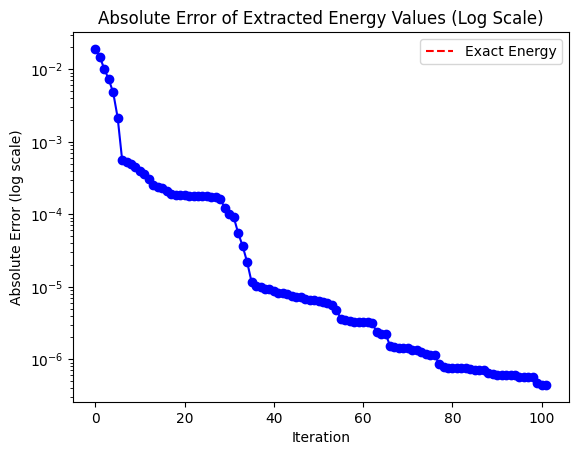

In [26]:
import re
import matplotlib.pyplot as plt

file_path = PATH  # Replace with the actual path to your log file
exact_energy = -15.595246585720805

energy_values = []

with open(file_path, 'r') as file:
    for line in file:
        match = re.search(r'INFO \d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3} Add new element to final ansatz .* Energy ([-+]?[0-9]*\.?[0-9]+([eE][-+]?[0-9]+)?)', line)
        if match:
            energy_values.append(float(match.group(1)))

# Calculate the absolute error
abs_error_values = [abs(exact_energy - energy) for energy in energy_values]

# Plot the absolute error values with log scale on the y-axis
plt.semilogy(abs_error_values, marker='o', linestyle='-', color='b')
plt.axhline(0, color='r', linestyle='--', label='Exact Energy')

plt.title('Absolute Error of Extracted Energy Values (Log Scale)')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error (log scale)')
plt.legend()
plt.show()


In [58]:
# BeH2
exact_energy = -15.595246585720805
HF_energy = -15.561278032308028
non_adapt = -15.594872812244665
experment_names = [
               #  "BeH2_adapt_eff_f_exc_{'occupied': [], 'unoccupied': []}_26-Dec-2023 (12:48:21.885832).csv",
                   "BeH2_adapt_f_exc_{'occupied': [], 'unoccupied': []}_26-Dec-2023 (10:45:09.198400).csv",
                  #  "BeH2_adapt_q_exc_{'occupied': [], 'unoccupied': []}_25-Dec-2023 (21:41:17.533591).csv",
                #    "BeH2_adapt_f_exc_{'occupied': [], 'unoccupied': []}_bk_26-Dec-2023 (21:39:04.935521).csv",
                   ]
#parameters:468
#cnot_count:43904.0
print(non_adapt-exact_energy)

0.0003737734761397604


In [67]:
#HF
exact_energy =-98.60330159397462
HF_energy = -98.57077998601414
experment_names = [
               #  "HF_adapt_eff_f_exc_{'occupied': [], 'unoccupied': []}_26-Dec-2023 (14:00:13.733627).csv",
                "HF_adapt_f_exc_{'occupied': [], 'unoccupied': []}_26-Dec-2023 (14:08:26.958057).csv",
                # "HF_adapt_q_exc_{'occupied': [], 'unoccupied': []}_26-Dec-2023 (14:14:15.832493).csv",
                # "HF_adapt_f_exc_{'occupied': [], 'unoccupied': []}_bk_26-Dec-2023 (21:19:13.618501).csv",
               #  "HF_adapt_q_exc_{'occupied': [], 'unoccupied': []}_bk_26-Dec-2023 (21:29:48.826543).csv",
                   ]
#parameters:65
#cnot_count = 4560.0
print(non_adapt-exact_energy)

83.00842878172996


In [68]:
#H2O
exact_energy = -75.02329122807933
HF_energy = -74.9630631297274
non_adapt =  -75.02318755399628
experment_names = [
    # "H20_adapt_eff_f_exc_{'occupied': [], 'unoccupied': []}_26-Dec-2023 (14:22:35.720881).csv",
     "H20_adapt_f_exc_{'occupied': [], 'unoccupied': []}_26-Dec-2023 (17:13:16.985321).csv",
    # "H20_adapt_q_exc_{'occupied': [], 'unoccupied': []}_26-Dec-2023 (16:11:05.020782).csv",
   
    # "H20_adapt_f_exc_{'occupied': [], 'unoccupied': []}_bk_26-Dec-2023 (22:38:17.789174).csv",
]
print(non_adapt-exact_energy)
#parameters:310
#cnot_count = 28480.0

0.00010367408305000936


134
3.1389078003485338e-09


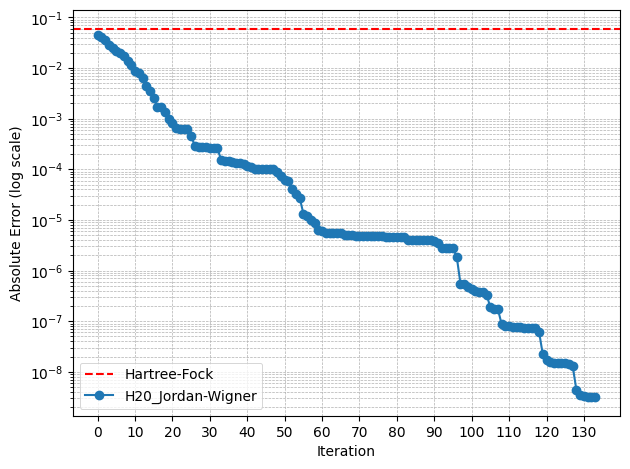

In [70]:
import csv
import matplotlib.pyplot as plt
error_values = {}
cnot_counts = {}
for name in experment_names:
    csv_file_path = CSV_BASE+name
    # energy_values[name] = []
    error_values[name] = []
    cnot_counts[name] = []
    with open(csv_file_path, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            # energy_values[name].append(float(row['E']))
            error_values[name].append(float(row['error']))
            cnot_counts[name] .append(float(row['cnot_count']))
    print(len(error_values[name]))
print(error_values[name][-1])

# Calculate the error
error = abs(exact_energy - HF_energy)

# Create a horizontal line plot
plt.axhline(y=error, color='r', linestyle='--', label='Hartree-Fock')
for name in experment_names:
    plt.semilogy(error_values[name], marker='o', linestyle='-', label=name.split('_')[0]+'_'+ ('Bravyi-Kitaev' if name.split('_')[-2]=='bk' else 'Jordan-Wigner'))
    # plt.semilogy(error_values[name], marker='o', linestyle='-', label=name.split('_')[0] + '_' + ('Fermionic' if name.split('_')[2] == 'f' else 'Qubit'))

# plt.title('Absolute Error of Extracted Energy Values (Log Scale)')
plt.xlabel('Iteration')
plt.ylabel('Absolute Error (log scale)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add a grid with dashed lines

plt.xticks(range(0, max(len(error_values[name]) for name in experment_names), 10))

# Adjust the appearance of the legend
legend = plt.legend()
legend.get_frame().set_linewidth(0.7)

# Customize the appearance of the plot
plt.tight_layout()  # Adjust layout for better appearance

# Save the figure as an image (optional)
# plt.savefig('error_plot.png', dpi=300, bbox_inches='tight')

plt.show()



134
13648.0


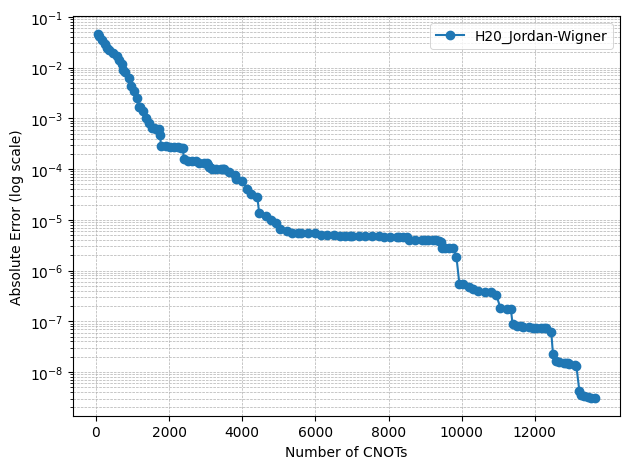

In [69]:
import csv
error_values = {}
cnot_counts = {}
for name in experment_names:
    csv_file_path = CSV_BASE+name
    # energy_values[name] = []
    error_values[name] = []
    cnot_counts[name] = []
    with open(csv_file_path, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            # energy_values[name].append(float(row['E']))
            error_values[name].append(float(row['error']))
            cnot_counts[name] .append(float(row['cnot_count']))
    print(len(error_values[name]))
print(cnot_counts[name][-1])
import matplotlib.pyplot as plt
# energy_values = {}
# Calculate the error
error = abs(exact_energy - HF_energy)

# Create a horizontal line plot
# plt.axhline(y=error, color='r', linestyle='--', label='Hartree-Fock')
for name in experment_names:
    plt.semilogy(cnot_counts[name],error_values[name], marker='o', linestyle='-', label=name.split('_')[0]+'_'+ ('Bravyi-Kitaev' if name.split('_')[-2]=='bk' else 'Jordan-Wigner'))
    # if name.split('_')[2] == 'f':
    #     type = 'Fermionic'
    # elif name.split('_')[2] == 'q':
    #     type = 'Qubit'
    # else:
    #     type = 'Efficient-Fermionic'
    # plt.semilogy(cnot_counts[name], error_values[name], marker='o', linestyle='-', label=name.split('_')[0] + '_' + type)

# plt.title('Absolute Error of Extracted Energy Values (Log Scale)')
plt.xlabel('Number of CNOTs')
plt.ylabel('Absolute Error (log scale)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add a grid with dashed lines

plt.xticks(range(0, max(int(cnot_counts[name][-1]) for name in experment_names), 2000))

# Adjust the appearance of the legend
legend = plt.legend()
legend.get_frame().set_linewidth(0.7)

# Customize the appearance of the plot
plt.tight_layout()  # Adjust layout for better appearance

# Save the figure as an image (optional)
# plt.savefig('error_plot.png', dpi=300, bbox_inches='tight')

plt.show()



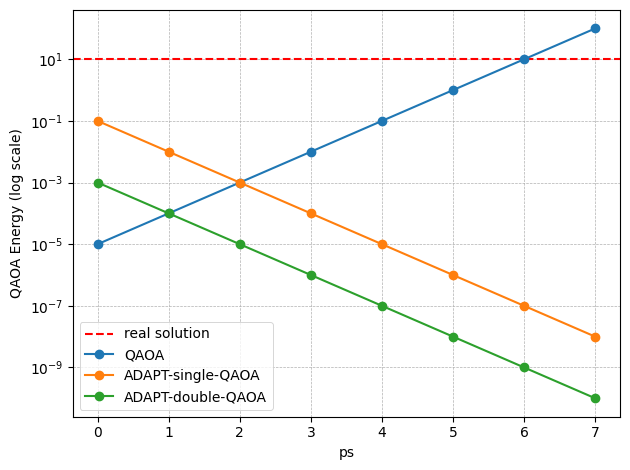

In [13]:
import csv
import matplotlib.pyplot as plt
ps = [0,1,2,3,4,5,6,7]
qaoa_energies = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2]
adapt_single = [10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6, 10**-7, 10**-8]
adapt_multi = [10**-3, 10**-4, 10**-5, 10**-6, 10**-7, 10**-8, 10**-9, 10**-10]
experments = {'QAOA':qaoa_energies,
                   'ADAPT-single-QAOA': adapt_single,
                   'ADAPT-double-QAOA':adapt_multi
                    }
# Create a horizontal line plot
plt.axhline(y=10, color='r', linestyle='--', label='real solution')
for name, y in experments.items():
    plt.semilogy(ps, y, marker='o', linestyle='-', label=name)

# plt.title('Absolute Error of Extracted Energy Values (Log Scale)')
plt.xlabel('ps')
plt.ylabel('QAOA Energy (log scale)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add a grid with dashed lines

# plt.xticks(range(0,8, 1))

# Adjust the appearance of the legend
legend = plt.legend()
legend.get_frame().set_linewidth(0.7)

# Customize the appearance of the plot
plt.tight_layout()  # Adjust layout for better appearance

# Save the figure as an image (optional)
# plt.savefig('error_plot.png', dpi=300, bbox_inches='tight')

plt.show()

